># **<span style="color:#ef233c">Time Series Analysis Of FNIRS</span>**
>- ***<span style="color:#13315c"> Gokul Agrawal | CL24M004<span>*** 
>- ***<span style="color:#13315c"> Shreenandan Sahu | CL24M013<span>***
>- ***<span style="color:#13315c"> K S Suraksha Jain | CL24M015<span>***


>### **<span style="color:#ef233c">Frequency Domain Analysis</span>**


 **<span style="color:teal">Defination**: A time series is a series of data points recorded at different time-intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques.

*<span style="color:#9e0059">In This notebook we will focus on doing the Frequency Domain Analysis. We have tried to do the following analysis.*


- **<span style="color:#e09f3e">Fourier Transform (FT)**:  A mathematical transformation that decomposes a signal into its constituent frequencies.
- **<span style="color:#e09f3e">Power Spectral Density (PSD)**: A function that shows the distribution of power (or variance) across different frequencies in a signal.
- **<span style="color:#e09f3e">Bandpass and Filtering Analysis**: A technique to isolate and examine specific frequency bands of interest within a signal.

*<span style="color:#9e0059">In this notebook we have tried analysing the data using python inbuilt functions and we have also developed our own code to compute the same frequency domain parameter and compared them. Every block of code has an explanation markdown.*



> ### **<span style="color:#ff0054">ABOUT DATA SET**
We have used FNIRS data recorded for ***<span style="Color:#e09f3e">Frontotemporal activation differs between perception of simulated cochlear implant speech and speech in background noise: An image-based fNIRS study*** available at https://data.mendeley.com/datasets/4cjgvyg5p2/1 for the paper https://pmc.ncbi.nlm.nih.gov/articles/PMC8503862/#ABS1 .

Sampled at a ***Sampling Rate of 25 Hz*** the database has collection of data from 28 channels covering the frontotemporal region of the head. The data was recorded for around ***35 minutes***.

For the analysis purpose we have choosen the CH7.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *
from scipy.signal import *

#umber of datapoints of the given data used
row_num=10000 

#choosing the desired columns from the 29 columns 28 channels and 1 time column
#loading the data to dataframe of pandas
df=pd.read_csv("DataSet.csv",usecols=["Time","CH7"],nrows=row_num)

#coverting the dataframe to 2D array in python to ease working on it. 
data_main=df.to_numpy()

#print(data_main[:,0]) : is used to represent all values
#print(data_main[0][0]) row,column configuration.


#### <span style="color:#ff0054"> **Ploting The Raw Data**

Using the matplotlib library we will plot the graph of the raw data

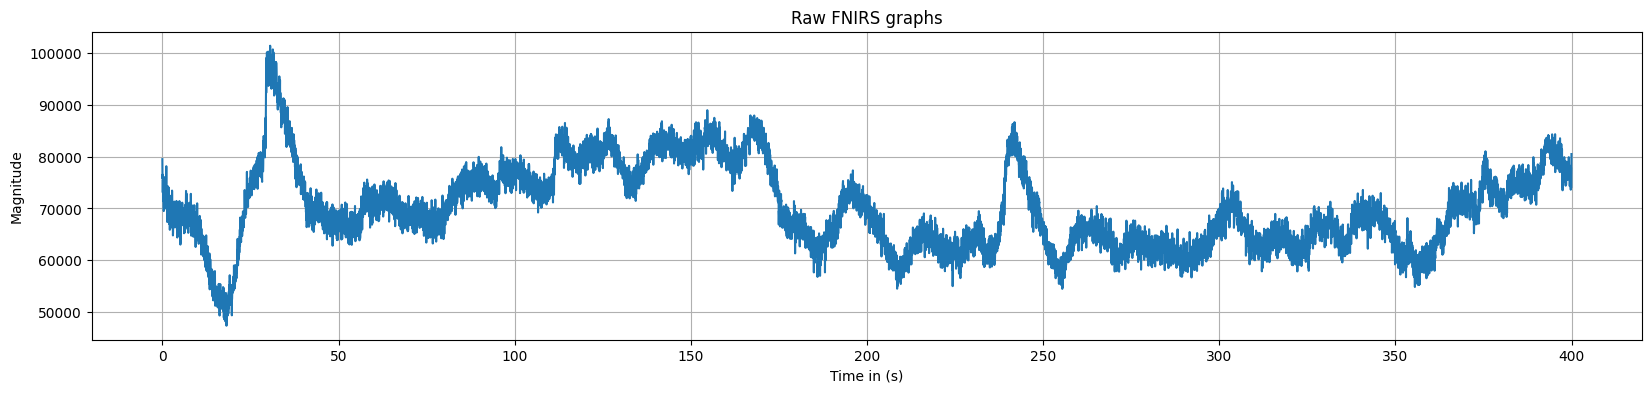

In [2]:
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1])
plt.title("Raw FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

#### <span style="color:#ff0054"> **Moving Average Filtering**

We will filter the high frequency noise component using moving average filter averaging over n samples. The following code is a function for moving average filter.

In [3]:
def moving_average(data, window):
    num_row = data.size  # Get the total number of elements
    flt_data = np.full(num_row, data.mean())  # Initialize the output array with the mean value of data

    for j in range(window - 1, num_row):
        k = j - (window - 1)
        flt_data[j] = data[k:j + 1].sum() / window  # Calculate the moving average

    return flt_data


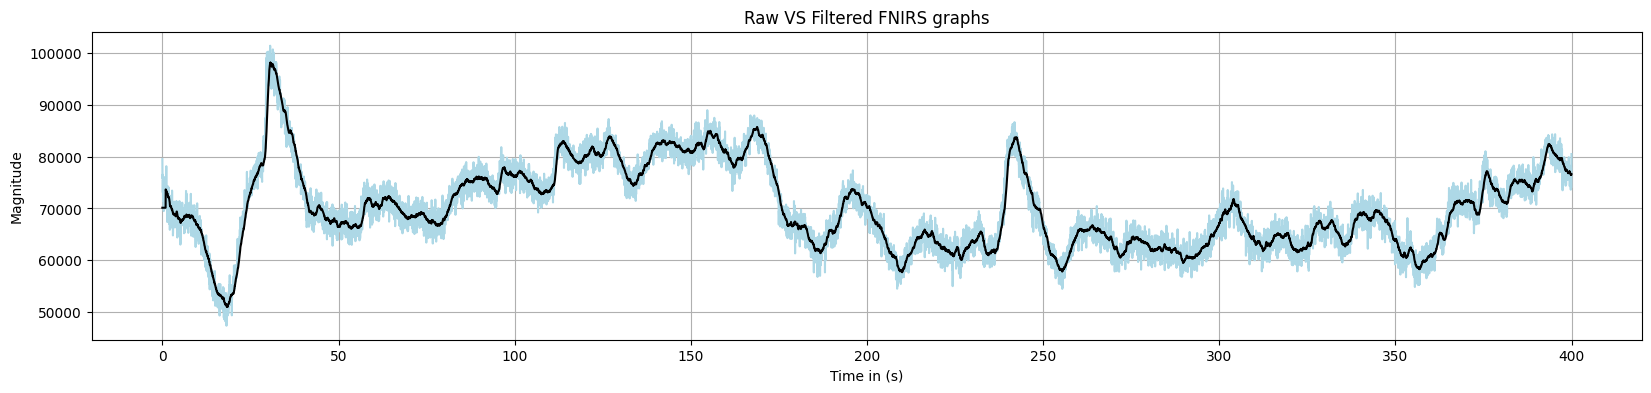

In [4]:
filtered_data=moving_average(data_main[:,1],25)
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1], color='lightblue')
plt.plot(data_main[:,0],filtered_data, color='black')
plt.title("Raw VS Filtered FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

- **<span style="color:#e09f3e">Fourier Transform (FT)**:  A mathematical transformation that decomposes a signal into its constituent frequencies.

In [12]:
sampling_rate=25
fft_values = np.fft.fft(data_main[:,1])  # FFT of the signal
fft_frequencies = np.fft.fftfreq(len(data_main[:,1]), 1 / sampling_rate
)  # Frequency bin

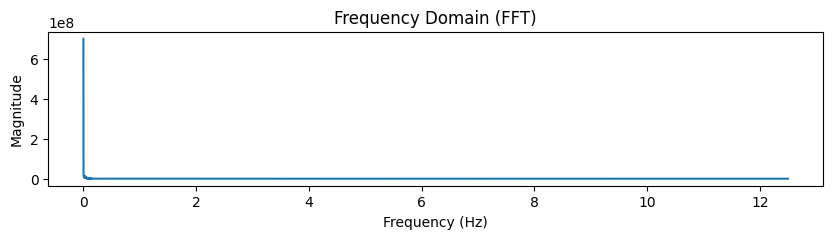

In [13]:
plt.figure(figsize=(10, 2))
plt.plot(fft_frequencies[:len(data_main[:,1]) // 2], np.abs(fft_values[:len(data_main[:,1]) // 2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain (FFT)")
plt.show()

- **<span style="color:#e09f3e">Power Spectral Density (PSD)**: A function that shows the distribution of power (or variance) across different frequencies in a signal.

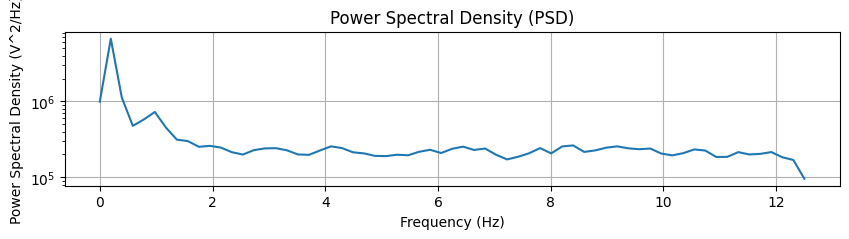

In [14]:
frequencies, psd_values = welch(data_main[:,1], fs=sampling_rate, nperseg=128)

plt.figure(figsize=(10, 2))
plt.semilogy(frequencies, psd_values)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (V^2/Hz)")
plt.title("Power Spectral Density (PSD)")
plt.grid()
plt.show()

- **<span style="color:#e09f3e">Bandpass and Filtering Analysis**: A technique to isolate and examine specific frequency bands of interest within a signal.

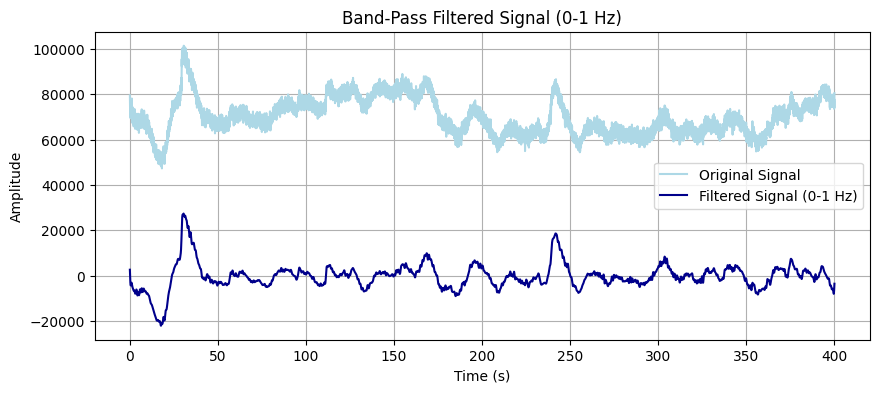

In [40]:
lowcut = 0.01  # Lower bound (just above zero to avoid zero frequency)
highcut = 1.0  # Upper bound
order = 4  # Order of the filter

# Design the Butterworth band-pass filter
nyquist = 0.5 * sampling_rate  # Nyquist frequency
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype="band")

# Apply the band-pass filter to the signal
filtered_signal = filtfilt(b, a, data_main[:,1])

plt.figure(figsize=(10, 4))
plt.plot(data_main[:,0], data_main[:,1], label="Original Signal", color="lightblue")
plt.plot(data_main[:,0], filtered_signal, label="Filtered Signal (0-1 Hz)", color="darkblue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Band-Pass Filtered Signal (0-1 Hz)")
plt.grid()
plt.show()

PSD for Filtered Data

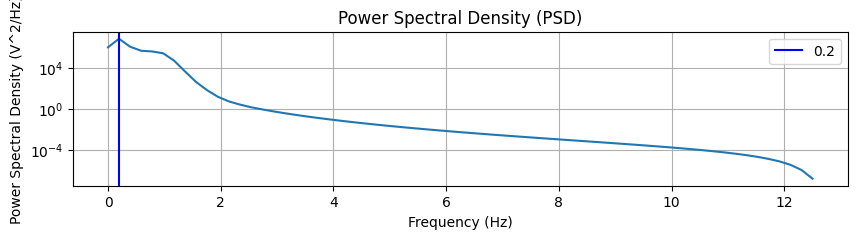

In [52]:
frequencies, psd_values = welch(filtered_signal, fs=sampling_rate, nperseg=128)

plt.figure(figsize=(10, 2))
plt.semilogy(frequencies, psd_values)
plt.axvline(x=0.2, color='blue', linestyle='solid', label="0.2")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (V^2/Hz)")
plt.title("Power Spectral Density (PSD)")
plt.legend()
plt.grid()
plt.show()

FFT For filtered Data

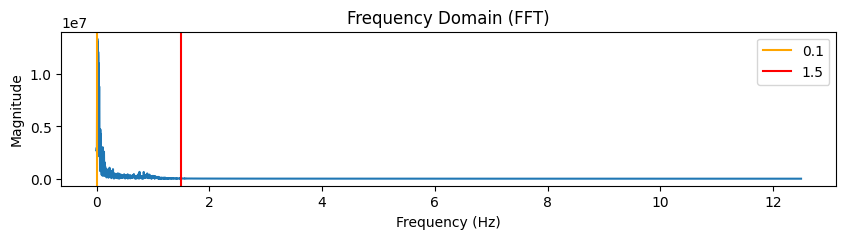

In [48]:
sampling_rate=25
fft_values = np.fft.fft(filtered_signal)  # FFT of the signal
fft_frequencies = np.fft.fftfreq(len(filtered_signal), 1 / sampling_rate
)  # Frequency bin

plt.figure(figsize=(10, 2))
plt.plot(fft_frequencies[:len(filtered_signal) // 2], np.abs(fft_values[:len(filtered_signal) // 2]))
plt.axvline(x=0.01, color='orange', linestyle='solid', label="0.1")
plt.axvline(x=1.5, color='red', linestyle='solid', label="1.5")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain (FFT)")
plt.legend()
plt.show()

### **Frequency Domain Results**


- ***Power Spectral Density***:- The majority of the power is concentrated at 0.1 to 1.5 Hz bandwidth and peak at 0.2Hz
- ***FFT***:- The Fourier transform revealed that the signal has frequency components which are in the range of 0.1 to 1.5 Hz bandwidth. Using this info along with the PSD info we could design a bandpass filter to filter out the frequencies. 
- ***Frequency band*** :- The majority of the frequency lies in the 0.1 to 1.5 Hz bandwidth
